In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('jsrt_metadata.csv')
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [2]:
#Handling All missing Values
df['subtlety']=df['subtlety'].replace(np.nan,df['subtlety'].astype('float').mean())
df['size']=df['size'].replace(np.nan, df['size'].astype('float').mean())
df
df.isnull().sum()

In [3]:
df['x']=df['x'].replace(np.nan, df['x'].astype('float').mean())
df['y']=df['y'].replace(np.nan, df['y'].astype('float').mean())
df['state']=df['state'].replace('non-nodule',np.nan)
df['state']=df['state'].replace(np.nan, df['state'].value_counts().idxmax())
df['position']=df['position'].replace(np.nan, df['position'].value_counts().idxmax())
df['diagnosis']=df['diagnosis'].replace(np.nan, df['diagnosis'].value_counts().idxmax())
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.00000,15.0,53,Male,1634.000000,692.000000,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.00000,30.0,78,Female,1614.000000,1090.000000,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.00000,30.0,63,Female,1303.000000,447.000000,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.00000,14.0,68,Female,606.000000,836.000000,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.00000,35.0,73,Female,1438.000000,692.000000,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,2.88961,NaN,50,Male,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer
243,JPCNN090.png,2.88961,NaN,68,Female,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer
244,JPCNN091.png,2.88961,NaN,81,Male,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer
245,JPCNN092.png,2.88961,NaN,70,Female,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer


(array([167.,  33.,  13.,   5.,   8.,   7.,   3.,   3.,   4.,   4.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

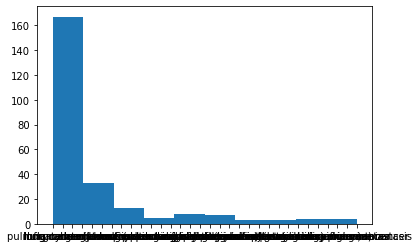

In [4]:
#Find the total number of patients of each disease (diagnosis) and plot in histogram.
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['diagnosis'])

([<matplotlib.patches.Wedge at 0x213048699d0>,
 [Text(-0.850588847327074, 0.6974945252851811, 'Malignant'),
  Text(0.8505889126312205, -0.6974944456473027, 'Benign')],
 [Text(-0.4639575530874948, 0.38045155924646235, '78.1%'),
  Text(0.4639575887079384, -0.3804515158076196, '21.9%')])

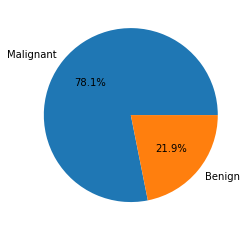

In [5]:
#Find the total number of patients of each disease (diagnosis) with respect to the disease state(malignant or benign) and plot in piechart
plt.pyplot.pie(df['state'].value_counts(), autopct='%1.1f%%',labels=['Malignant', 'Benign'])

([<matplotlib.patches.Wedge at 0x2130489a070>,
 [Text(-0.06292471903937313, 1.098198743276378, 'Male'),
  Text(0.06292471903937276, -1.098198743276378, 'Female')],
 [Text(-0.03432257402147625, 0.5990174963325697, '51.8%'),
  Text(0.034322574021476045, -0.5990174963325697, '48.2%')])

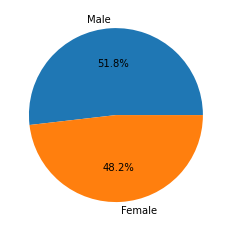

In [6]:
plt.pyplot.pie(df['gender'].value_counts(), autopct='%1.1f%%',labels=['Male', 'Female'])

In [7]:
lungocc=0
itr=0
df['diagnosis'].value_counts()

lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

([<matplotlib.patches.Wedge at 0x2130491b5e0>,
 [Text(1.1, 0.0, 'pulmonary hematoma'),
  Text(1.1, 0.0, 'sclerosing hemangioma'),
  Text(1.099854273610275, 0.017904659204087993, 'lung cancer(large cell carcinoma)'),
  Text(1.0976691499073101, 0.07157120469688366, 'lung cancer(squamous cell carcinoma)'),
  Text(1.094757903004192, 0.1072619867887238, 'organizing pneumonia'),
  Text(1.094757903004192, 0.1072619867887238, 'inflammatory mass'),
  Text(1.092866971698889, 0.12506711066343526, 'lung canceror metastasis'),
  Text(1.0882169983261598, 0.1605732373529383, 'metastasis of uterine cancer'),
  Text(1.0854591883020641, 0.1782648325683561, 'pneumonia'),
  Text(1.0824137781894139, 0.19590919525565545, 'metastasis of ovarian cancer'),
  Text(1.0629036224239627, 0.28325940308843794, 'metastasis of colon cancer'),
  Text(1.042221180853411, 0.35181672811354764, 'unknown'),
  Text(1.042221180853411, 0.35181672811354764, 'organiging pneumonia'),
  Text(1.0363566010814553, 0.36873431545611995, 

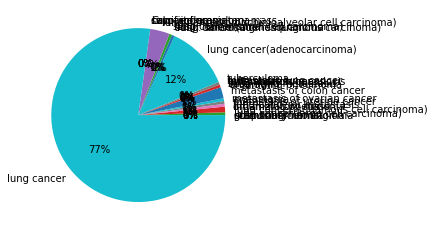

In [8]:
#Q2A
lst=df['diagnosis']
lst=list(set(lst))
maligList=[0]*len(lst)
benList=[0]*len(lst)
lstitr=0
occ=0
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['state'][itr]=='malignant':
                occ+=1
        itr+=1  
    maligList[lstitr]=occ
    lstitr+=1
    occ=0
    
plt.pyplot.pie(maligList,autopct='%1.0f%%',labels=lst)

([<matplotlib.patches.Wedge at 0x21304a299a0>,
 [Text(1.0925621934054306, 0.12770220648491118, 'pulmonary hematoma'),
  Text(1.0336618818860421, 0.3762221603465248, 'sclerosing hemangioma'),
  Text(0.9829959026438434, 0.49367910162920164, 'lung cancer(large cell carcinoma)'),
  Text(0.9829959026438434, 0.49367910162920164, 'lung cancer(squamous cell carcinoma)'),
  Text(0.9526279420172694, 0.550000003716311, 'organizing pneumonia'),
  Text(0.7548657968002127, 0.8001110103111819, 'inflammatory mass'),
  Text(0.5499999925673781, 0.9526279484541089, 'lung canceror metastasis'),
  Text(0.5499999925673781, 0.9526279484541089, 'metastasis of uterine cancer'),
  Text(0.49367909012486194, 0.98299590842154, 'pneumonia'),
  Text(0.4356877338869099, 1.0100377213453413, 'metastasis of ovarian cancer'),
  Text(0.4356877338869099, 1.0100377213453413, 'metastasis of colon cancer'),
  Text(0.19101298416420226, 1.083288530300532, 'unknown'),
  Text(-0.127702219271543, 1.0925621919108874, 'organiging pn

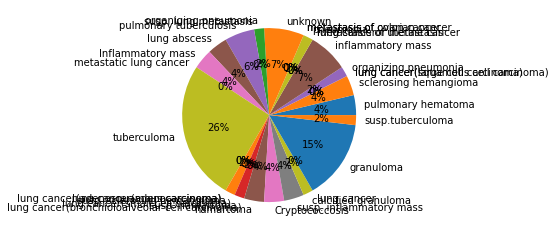

In [9]:
#Q2B
lstitr=0   
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['state'][itr]=='benign':
                occ+=1
        itr+=1  
    benList[lstitr]=occ
    lstitr+=1
    occ=0

plt.pyplot.pie(benList,autopct='%1.0f%%',labels=lst)

([<matplotlib.patches.Wedge at 0x21304b28f40>,
 [Text(1.0996166960164684, 0.02903656043380658, 'pulmonary hematoma'),
  Text(1.0984670511966799, 0.05805288481437255, 'sclerosing hemangioma'),
  Text(1.0965518667468876, 0.08702875119129332, 'lung cancer(large cell carcinoma)'),
  Text(1.086229084483789, 0.17351189014447835, 'lung cancer(squamous cell carcinoma)'),
  Text(1.0755581759859052, 0.23059620567102376, 'organizing pneumonia'),
  Text(1.0618894936356957, 0.2870378081475081, 'inflammatory mass'),
  Text(1.0452611345063465, 0.3426793846885246, 'lung canceror metastasis'),
  Text(1.0452611345063465, 0.3426793846885246, 'metastasis of uterine cancer'),
  Text(1.0452611345063465, 0.3426793846885246, 'pneumonia'),
  Text(1.0452611345063465, 0.3426793846885246, 'metastasis of ovarian cancer'),
  Text(1.0358512404885145, 0.37015160080486764, 'metastasis of colon cancer'),
  Text(1.0257194448219087, 0.3973658522246668, 'unknown'),
  Text(1.0148728085204188, 0.42430317289159836, 'organigi

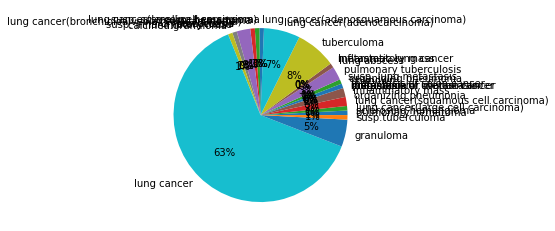

In [10]:
#Q3A
Mlist=[0]*len(lst)
Flist=[0]*len(lst)
lstitr=0   
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['gender'][itr]=='Male':
                occ+=1
        itr+=1  
    Mlist[lstitr]=occ
    lstitr+=1
    occ=0

plt.pyplot.pie(Mlist,autopct='%1.0f%%',labels=lst)

([<matplotlib.patches.Wedge at 0x21305c00940>,
 [Text(1.0996687005658248, 0.02699535137520352, 'pulmonary hematoma'),
  Text(1.0947031993394167, 0.10781885436251668, 'sclerosing hemangioma'),
  Text(1.088094160961259, 0.16140352190089793, 'lung cancer(large cell carcinoma)'),
  Text(1.088094160961259, 0.16140352190089793, 'lung cancer(squamous cell carcinoma)'),
  Text(1.0838054066278355, 0.18805807763633137, 'organizing pneumonia'),
  Text(1.0670343785139984, 0.26727819789359025, 'inflammatory mass'),
  Text(1.0444809986523405, 0.3450499144387807, 'lung canceror metastasis'),
  Text(1.026292078718213, 0.39588454018848696, 'metastasis of uterine cancer'),
  Text(1.005630731273884, 0.4457654454054889, 'pneumonia'),
  Text(0.982546731315067, 0.4945724626200672, 'metastasis of ovarian cancer'),
  Text(0.9293389217746779, 0.5884973818758069, 'metastasis of colon cancer'),
  Text(0.8150462378904552, 0.7387148503317202, 'unknown'),
  Text(0.7387148503317202, 0.815046237890455, 'organiging pn

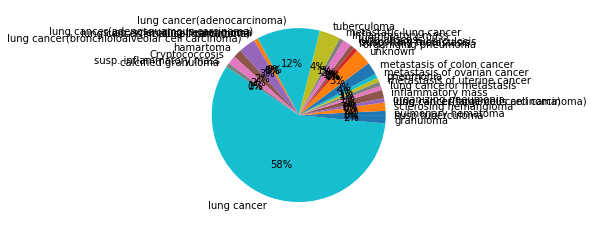

In [11]:
#Q3B
lstitr=0   
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['gender'][itr]=='Female':
                occ+=1
        itr+=1  
    Flist[lstitr]=occ
    lstitr+=1
    occ=0

plt.pyplot.pie(Flist,autopct='%1.0f%%',labels=lst)